<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/ENL_cerrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

#Metodos Cerrados

##Metodo de Biseccion

In [ ]:
def biseccion(f,x0,x1,tol=1e-5):
  '''
  El metodo de Biseccion es un metodo cerrado para resolver ecuaciones no lineales
  los argumentos son:
       f : ecuacion a resolver expresada en la forma f(x)=0
  x0, x1 : puntos que encierran la raiz f(x0)*f(x1)<0
     tol : tolerancia (valor por defecto 1e-5)
  '''
  if f(x0)*f(x1)>0:
    raise Exception('Rango invalido, no cruza el eje x!!')
  x=x0
  tabla=pd.DataFrame(columns=['x0','x','x1','f(x0)','f(x)','f(x1)'])
  while np.abs(f(x))>tol:
    x=(x0+x1)/2
    tabla=tabla.append({'x0':x0,'x':x,'x1':x1,
                        'f(x0)':f(x0),'f(x)':f(x),'f(x1)':f(x1)},
                       ignore_index=True)
    if f(x0)*f(x)<0:
      x1=x
    else:
      x0=x

  return x,tabla

In [ ]:
help(biseccion)

Help on function biseccion in module __main__:

biseccion(f, x0, x1, tol=1e-05)
    El metodo de Biseccion es un metodo cerrado para resolver ecuaciones no lineales
    los argumentos son:
         f : ecuacion a resolver expresada en la forma f(x)=0
    x0, x1 : puntos que encierran la raiz f(x0)*f(x1)<0
       tol : tolerancia (valor por defecto 1e-5)



##Metodo de la Regla Falsa
Se debe modificar para calcular x

In [ ]:
def reglafalsa(f,x0,x1,tol=1e-5):
  if f(x0)*f(x1)>0:
    raise Exception('Rango invalido, no cruza el eje x!!')
  x=x0
  tabla=pd.DataFrame(columns=['x0','x','x1','f(x0)','f(x)','f(x1)'])
  while np.abs(f(x))>tol:
    x= 0#Escriban aqui la ecuacion para calcular x
    tabla=tabla.append({'x0':x0,'x':x,'x1':x1,
                        'f(x0)':f(x0),'f(x)':f(x),'f(x1)':f(x1)},
                       ignore_index=True)
    if f(x0)*f(x)<0:
      x1=x
    else:
      x0=x

  return x,tabla

#Metodos Abiertos

##Metodo de Newton - Raphson

In [ ]:
def nr(f,df,x,tol=1e-5):
  tabla=pd.DataFrame(columns=['x','f(x)','df(x)'])
  while np.abs(f(x))>tol:
    x=x-f(x)/df(x)
    tabla=tabla.append({'x':x,
                        'f(x)':f(x),
                        'df(x)':df(x)},
                       ignore_index=True)
    
  return x,tabla

##Metodo de la Secante
Se debe modificar para calcular x

In [ ]:
def secante(f,x0,x1,tol=1e-5):
  x=x0
  tabla=pd.DataFrame(columns=['x0','x1','x','f(x0)','f(x1)','f(x)'])
  while np.abs(f(x))>tol:
    x=0 #Escriban aqui la ecuacion para calcular x
    tabla=tabla.append({'x0':x0,'x1':x1,'x':x,
                        'f(x0)':f(x0),'f(x1)':f(x1),'f(x)':f(x)},
                       ignore_index=True)
    x0=x1
    x1=x

  return x,tabla

##Metodo de Muller

In [ ]:
def muller(f,x0,x1,x2,tol=1e-5):
  tabla=pd.DataFrame(columns=['x0','x1','x2','x3','f(x0)','f(x1)','f(x2)','f(x3)'])
  x3=x0
  while np.abs(f(x3))>tol:
    d1=(f(x1)-f(x0))/(x1-x0)
    d2=(f(x2)-f(x1))/(x2-x1)
    d3=(d2-d1)/(x2-x0)
    a=d3
    b=d1-a*(x0+x1)
    c=f(x0)+x0*(a*x1-d1)
    den1=-b+np.sqrt(b**2-4*a*c+0j)
    den2=-b-np.sqrt(b**2-4*a*c+0j)
    if np.abs(den1)>np.abs(den2):
      x3=2*c/den1
    else:
      x3=2*c/den2
    tabla=tabla.append({'x0':x0,'x1':x1,'x2':x2,'x3':x3,
                        'f(x0)':f(x0),'f(x1)':f(x1),'f(x2)':f(x2),'f(x3)':f(x3)},
                       ignore_index=True)
    x0=x1
    x1=x2
    x2=x3
  return x3,tabla

##Metodo del Punto fijo

In [ ]:
def puntofijo(x,g,tol=1e-5):
  tabla=pd.DataFrame(columns=['x','g(x)'])
  while np.abs(x-g(x))>tol:
    x=g(x)
    tabla=tabla.append({'x':x,
                        'g(x)':g(x)},
                       ignore_index=True)
    
  return x,tabla

##Metodo de Wegstein

In [ ]:
def wegstein(x0,g,tol=1e-5):
  tabla=pd.DataFrame(columns=['x3','g(x3)'])
  x1=g(x0)
  x2=g(x1)
  x3=x2
  while np.abs(x3-g(x3))>tol:
    x3 =( x1*g(x2)-x2*g(x1))/(x1 -g(x1)-x2+g(x2))
    tabla=tabla.append({'x3':x3,
                        'g(x3)':g(x3)},
                       ignore_index=True)
    x1=x2
    x2=x3
  return x3,tabla

##Ejemplos

1. Primero se define la funcion a resolver, recuerde que debe estar en la forma $f(x)=0$

In [1]:
def f(x):
  return x**2-2

2. Se grafica para observar el comportamiento de la funcion

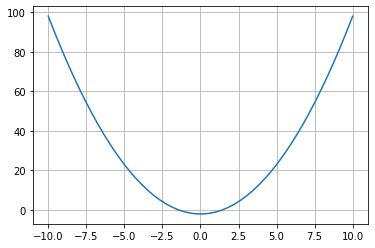

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(-10,10)
y=f(x)
plt.plot(x,y)
plt.grid()
plt.show()

3. Se aplica el metodo numerico para obtener la raiz de la ecuacion pasandole los parametros que requiere

In [ ]:
xr,tabla=biseccion(f,0,2)
print(xr)
tabla

1.414215087890625


,x0,x,x1,f(x0),f(x),f(x1)
0,0.000000,1.000000,2.000000,-2.000000,-1.000000,2.000000
1,1.000000,1.500000,2.000000,-1.000000,0.250000,2.000000
2,1.000000,1.250000,1.500000,-1.000000,-0.437500,0.250000
3,1.250000,1.375000,1.500000,-0.437500,-0.109375,0.250000
4,1.375000,1.437500,1.500000,-0.109375,0.066406,0.250000
5,1.375000,1.406250,1.437500,-0.109375,-0.022461,0.066406
6,1.406250,1.421875,1.437500,-0.022461,0.021729,0.066406
7,1.406250,1.414062,1.421875,-0.022461,-0.000427,0.021729
8,1.414062,1.417969,1.421875,-0.000427,0.010635,0.021729
9,1.414062,1.416016,1.417969,-0.000427,0.005100,0.010635


In [7]:
from scipy import optimize

r=optimize.bisect(f,1,2)
print('Raiz ',r)

Raiz  1.4142135623715149


4. Se grafica el resultado

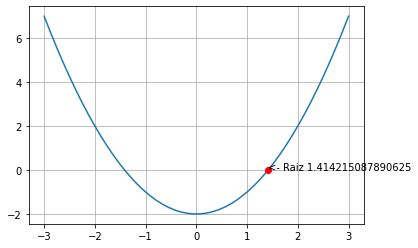

In [ ]:
x=np.linspace(-3,3)
y=f(x)
plt.plot(x,y,xr,f(xr),'or')
plt.text(xr,f(xr),'<- Raiz '+str(xr))
plt.grid()
plt.show()

In [ ]:
def df(x):
  return 2*x

In [ ]:
xr,tabla=nr(f,df,1)
print(xr)
tabla

1.4142156862745099


,x,f(x),df(x)
0,1.500000,0.250000,3.000000
1,1.416667,0.006944,2.833333
2,1.414216,0.000006,2.828431


In [26]:
from scipy import optimize
import sympy as sp

r=optimize.newton(f,1,lambda x:2*x)
print(r)

1.4142135623730951


In [ ]:
raiz,tabla=muller(f,0,1,2)
print(raiz)
tabla

(1.414213562373095-0j)


,x0,x1,x2,x3,f(x0),f(x1),f(x2),f(x3)
0,0j,(1+0j),(2+0j),(1.414213562373095-0j),(-2+0j),(-1+0j),(2+0j),(-4.440892098500626e-16-0j)


In [ ]:
def g(v):
 n=2
 R =0.082
 a =3.592
 b =0.04267
 T =300
 P =10
 return n*R*T/(P+n **2* a/v **2) +n*b

In [ ]:
xr,tabla=puntofijo(2,g)
print(xr)
tabla

4.7055308745064055


,x,g(x)
0,3.705116,4.539188
1,4.539188,4.684617
2,4.684617,4.703017
3,4.703017,4.705234
4,4.705234,4.705499
5,4.705499,4.705531
6,4.705531,4.705535


In [ ]:
xr,tabla=wegstein(2,g)
print(xr)
tabla

4.705535166905485


,x3,g(x3)
0,4.715330,4.706704
1,4.705467,4.705527
2,4.705535,4.705535


Grafica de la solucion

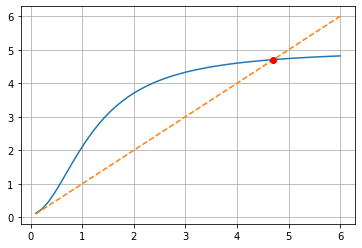

In [ ]:
import matplotlib.pyplot as plt

x=np.linspace(0.1,6)
y=g(x)

plt.plot(x,y,'-',x,x,'--',xr,g(xr),'or')
plt.grid()
plt.show()

#Raices complejas

trabajemos con la ecuacion $f(x)=x^2+2$ donde su raiz es $2i$

In [ ]:
#se define la funcion
def f(x):
  return x**2+2

#se define la derivada
def df(x):
  return 2*x

In [ ]:
xr,tabla=nr(f,df,1j) #Se debe dar un valor inicial complejo, por ejemplo 0+1i
print(xr)
tabla

1.4142156862745099j


,x,f(x),df(x)
0,1.5j,(-0.25+0j),3j
1,1.4166666666666667j,(-0.006944444444444642+0j),2.8333333333333335j
2,1.4142156862745099j,(-6.007304882871267e-06+0j),2.8284313725490198j


In [ ]:
xr,tabla=muller(f,0,1,2) #se pueden dar valores iniciales reales
print(xr)
tabla

(-0+1.414213562373095j)


,x0,x1,x2,x3,f(x0),f(x1),f(x2),f(x3)
0,0j,(1+0j),(2+0j),(-0+1.414213562373095j),(2+0j),(3+0j),(6+0j),(4.440892098500626e-16+0j)
